<a href="https://colab.research.google.com/github/vamshi12vamshi/project-/blob/main/imbd_sqllite_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

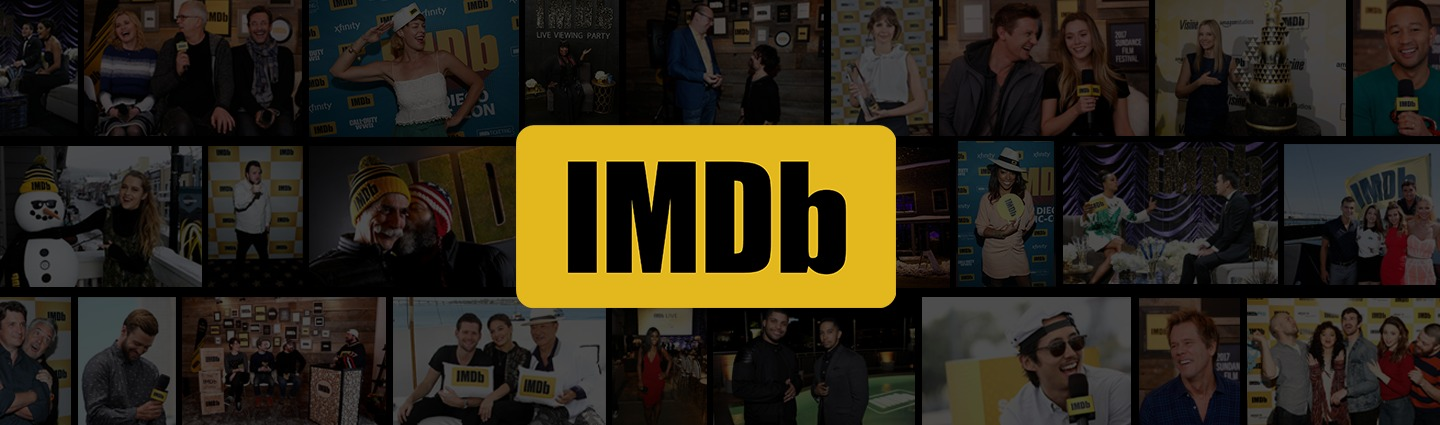

**.**This Database Contains Two Tables. The First Table Is Called 'directors', Contains The Name Of The Director And His Gender. The Second Table Is Called 'movies', Contains The Title Of The Movies, budget, revenue, popularity, etc.

**.**From This database, You Can Find Out The Best Movies Based On Income, Popularity And Votes. In Addition, You Can Also Find Out The Best Director Based On The Amount Of Revenue From All His Movies.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

**SQLite** :SQLite database is integrated with the application that accesses the database. The applications interact with the SQLite database read and write directly from the database files stored on disk.


---



---




**We import the sqlite3 module and then create a connection object which will connect us to the database and will let us execute the SQL statements**.

.sqlite3.connect(Database)

.**cursor**() - we can use the cursor object to call the execute() method to execute any SQL queries.
**STEPS**
To query data in an SQLite database from Python, you use these steps:

.First, establish a connection to the SQLite database by creating a Connection object.

.Next, create a Cursor object using the cursor method of the Connection object.

.Then, execute a SELECT statement.

.After that, call the fetchall() method of the cursor object to fetch the data.

.Finally, loop the cursor and process each row individually.

**1.Establishing the connection to the database**

In [2]:
db="/content/drive/MyDrive/imbd sql/movies.sqlite"
#This line establishes a connection to the specified SQLite database file. If the file doesn't exist, it will be created. If it does exist, the connection will be made to the existing database.
conn=sqlite3.connect(db)
cur=conn.cursor()
#Using the cursor, you can execute various SQL queries and commands.

1.Get all data about movies

In [3]:

#use the cursor object to call the execute() method to execute any SQL queries.
cur.execute("SELECT * FROM movies")

movies=cur.fetchall()
#movies -> if u print movies , all the data shown in list manner, can't understanadble

#Note - fetchall() --> fetch all rows for the current query, if no rows avaliable then,it returns an empty list.
movies=pd.DataFrame(movies,columns=['id','Original_title','Budget','Popularity','Release_date','Revenue','Title','Vote_average'
                                      ,'vote_count','Overview','Tagline','UID','Director_id'])
#Creating a dataframe, A dataframe contains rows and columns , It is a Two-dimensional, size-mutable, potentially heterogeneous tabular data.



The **cur.execute()** method is typically used in Python when working with databases to execute SQL queries.

.The **cur.fetchall()** method is used in Python when working with database cursors to retrieve all the rows resulting from a SELECT query executed using cur.execute() on a database cursor

In [4]:
movies

,id,Original_title,Budget,Popularity,Release_date,Revenue,Title,Vote_average,vote_count,Overview,Tagline,UID,Director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   Original_title  4773 non-null   object 
 2   Budget          4773 non-null   int64  
 3   Popularity      4773 non-null   int64  
 4   Release_date    4773 non-null   object 
 5   Revenue         4773 non-null   int64  
 6   Title           4773 non-null   object 
 7   Vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   Overview        4770 non-null   object 
 10  Tagline         3951 non-null   object 
 11  UID             4773 non-null   int64  
 12  Director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


**2.Get all data from directors**

In [6]:
cur.execute("SELECT * FROM directors")
#use the cursor object to call the execute() method to execute any SQL queries.

directors=cur.fetchall()
#Note - fetchall() --> fetch all rows for the current query, if no rows avaliable then,it returns an empty list.


In [7]:
#raw data
directors

[('James Cameron', 4762, 2, 2710, 'Directing'),
 ('Gore Verbinski', 4763, 2, 1704, 'Directing'),
 ('Sam Mendes', 4764, 2, 39, 'Directing'),
 ('Christopher Nolan', 4765, 2, 525, 'Directing'),
 ('Andrew Stanton', 4766, 2, 7, 'Directing'),
 ('Sam Raimi', 4767, 2, 7623, 'Directing'),
 ('Byron Howard', 4768, 2, 76595, 'Directing'),
 ('Joss Whedon', 4769, 2, 12891, 'Directing'),
 ('David Yates', 4770, 2, 11343, 'Directing'),
 ('Zack Snyder', 4771, 2, 15217, 'Directing'),
 ('Bryan Singer', 4772, 2, 9032, 'Directing'),
 ('Marc Forster', 4773, 2, 12995, 'Directing'),
 ('Andrew Adamson', 4774, 2, 5524, 'Directing'),
 ('Rob Marshall', 4775, 2, 17633, 'Directing'),
 ('Barry Sonnenfeld', 4776, 2, 5174, 'Directing'),
 ('Peter Jackson', 4777, 2, 108, 'Directing'),
 ('Marc Webb', 4778, 2, 87742, 'Directing'),
 ('Ridley Scott', 4779, 2, 578, 'Directing'),
 ('Chris Weitz', 4780, 0, 3288, 'Directing'),
 ('Anthony Russo', 4781, 2, 19271, 'Directing'),
 ('Peter Berg', 4782, 2, 36602, 'Directing'),
 ('Colin

**Converting Raw data into DataFrame**

In [8]:
#Creating a dataframe, A dataframe contains rows and columns , It is a Two-dimensional, size-mutable, potentially heterogeneous tabular data.

directors=pd.DataFrame(directors,columns=['name','id','gender','uid','department',])

In [9]:
directors

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing
...,...,...,...,...,...
2344,Shane Carruth,7106,2,76624,Directing
2345,Neill Dela Llana,7107,0,1174437,Directing
2346,Scott Smith,7108,0,1219158,Directing
2347,Daniel Hsia,7109,2,208138,Directing


In [10]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


**3: Check how many movies are present in iMDB**

In [11]:
movies.columns

Index(['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'],
      dtype='object')

In [12]:
directors.columns

Index(['name', 'id', 'gender', 'uid', 'department'], dtype='object')

In [13]:
cur.execute("SELECT COUNT(*) FROM movies")
#the code says that executing an SQL query to count the number of rows in a "movies" table in our SQLite database.
count_movies=cur.fetchall()
#retrieving all rows in query
print("The number of movies in IMBD are:",count_movies[0][0])

The number of movies in IMBD are: 4773


 4: **Find** **these** **3** **directors**: **James** **Cameron** ; **Luc** **Besson**


In [14]:
cur.execute("SELECT * FROM directors WHERE name in ('James Cameron','Luc Besson')")
#Wrutung a query that gives total info of 3 directors
top_directors=cur.fetchall()
#retrieving all values in query

In [15]:
print("The 3 directors are:",top_directors)

The 3 directors are: [('James Cameron', 4762, 2, 2710, 'Directing'), ('Luc Besson', 4949, 2, 59, 'Directing')]


The output says that each director info:

.Director **name** is '**James Cameron**',**id** is **4762**,**gender** is **2(Male)**, **uid** is **2710** and **department** is'**Directing**.'

.Diretor **name** is **Luc Besson**, **id** is **4949**, **gender** is **2(Male)**, **uid** is **59**, **department** is **Directing**.


**5: Find all directors with name** **starting with Steven.**



In [16]:
cur.execute("SELECT * FROM directors WHERE name LIKE 'Steven%' ")
#writing a query that retrieves the values from directors statrting with steven
director_S=cur.fetchall()
#fetching all rows by creating variable


In [17]:
print("The director starting with Steven is: \n \t ",director_S)

The director starting with Steven is: 
 	  [('Steven Spielberg', 4799, 2, 488, 'Directing'), ('Steven Soderbergh', 4909, 2, 1884, 'Directing'), ('Steven Brill', 5013, 2, 32593, 'Directing'), ('Steven Zaillian', 5117, 2, 2260, 'Directing'), ('Steven Quale', 5216, 2, 93214, 'Directing'), ('Steven Seagal', 5221, 2, 23880, 'Directing'), ('Steven E. de Souza', 5390, 2, 1726, 'Directing'), ('Steven Shainberg', 5803, 2, 67795, 'Directing'), ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]


**6: Count female directors.**

In [18]:
cur.execute("SELECT COUNT(*) AS female_Director FROM directors WHERE gender='1'")
#query that executes the count how many female directors are there
female_dir=cur.fetchall()
#fetching all values

In [19]:
print("The number of female directors are :",female_dir[0][0])

The number of female directors are : 150


**Question 7: Find the name of the 10th first women directors?**

In [20]:
cur.execute("SELECT name FROM directors WHERE gender==1 ORDER BY id" )
#executing a query by using a cursor execute() from directors table to get name of 10th female directorin database
female=cur.fetchall()

In [21]:
print("The 10th female director is:",female[9][0])

The 10th female director is: Angelina Jolie


**8: What are the 3 most popular movies**

In [22]:
movies.columns

Index(['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'],
      dtype='object')

In [23]:
cur.execute("SELECT Original_title FROM movies ORDER BY Popularity desc LIMIT 3")
#Executing a query that provides populat 3 most original_title names
top_3=cur.fetchall()


In [24]:
print(f"The top 3 movies are:",top_3[0][0])
print(f"The top 3 movies are:",top_3[1][0])
print(f"The top 3 movies are:",top_3[2][0])

The top 3 movies are: Minions
The top 3 movies are: Interstellar
The top 3 movies are: Deadpool


**Question 9: What are the 3 most bankable movies**

In [26]:
cur.execute("SELECT Original_title FROM movies ORDER BY Budget DESC limit 3")
#writing a query that highest 3 budget movies
bankable_movies=cur.fetchall()

In [27]:
print(f"The 3 most bankable movies are:",bankable_movies[0][0])
print(f"The 3 most bankable movies are:",bankable_movies[1][0])
print(f"The 3 most bankable movies are:",bankable_movies[2][0])

The 3 most bankable movies are: Pirates of the Caribbean: On Stranger Tides
The 3 most bankable movies are: Pirates of the Caribbean: At World's End
The 3 most bankable movies are: Avengers: Age of Ultron


**10: What is the most awarded average vote since the January 1st, 2000?**

In [28]:
movies.columns

Index(['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'],
      dtype='object')

In [29]:
directors.columns

Index(['name', 'id', 'gender', 'uid', 'department'], dtype='object')

In [30]:
cur.execute("SELECT Original_title FROM movies WHERE Release_date > '2000-01-01' ORDER BY Vote_average DESC LIMIT 1")
#writing a query that taht gets original title who has awarded most avg_voting
avg_vote=cur.fetchall()

In [32]:
print("The most awarded average voting is:",avg_vote[0][0])

The most awarded average voting is: Sardaarji


**11: Which movie(s) were directed by Brenda Chapman?**

In [33]:
cur.execute("SELECT Original_title FROM movies  JOIN directors ON directors.id = movies.director_id WHERE directors.name = 'Brenda Chapman';")
#query that we are using joins to find movie directed by Brenda Chapman
movie_dir=cur.fetchall()

In [34]:
print("The movie directed by Brenda Chapman is:",movie_dir[0][0])

The movie directed by Brenda Chapman is: Brave


**Question 12: Whose director made the most movies?**

In [35]:
cur.execute("SELECT directors.name as most_movies FROM directors JOIN movies ON directors.id=movies.director_id GROUP BY director_id ORDER BY COUNT(name) DESC LIMIT 1 ")
#writing a query by using a cursor execute()
most_movie=cur.fetchall()

In [36]:
print("The director made most movies is:",most_movie[0][0])

The director made most movies is: Steven Spielberg


**13: Whose director is the most bankable?**

In [37]:
cur.execute("SELECT directors.name FROM directors JOIN movies ON movies.director_id=directors.id GROUP BY directors.name ORDER BY SUM(movies.budget) DESC LIMIT 1" )

most_banking=cur.fetchall()

In [39]:
print("The director who is most bankable is:",most_banking[0][0])

The director who is most bankable is: Steven Spielberg


**Budget Analysis**

**1.Tell the top 10 highest budget making movies**

In [40]:
movies.columns

Index(['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'],
      dtype='object')

In [41]:
directors.columns

Index(['name', 'id', 'gender', 'uid', 'department'], dtype='object')

In [42]:
top_10=cur.execute("SELECT * FROM movies ORDER by Budget DESC LIMIT 10")
top_10_budget=cur.fetchall()
top_10=pd.DataFrame(top_10_budget,columns=['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
                                           'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview',
                                           'Tagline','UID', 'Director_id'])

In [43]:
top_10

,id,Original_title,Budget,Popularity,Release_date,Revenue,Title,Vote_average,vote_count,Overview,Tagline,UID,Director_id
0,43614,Pirates of the Caribbean: On Stranger Tides,380000000,135,2011-05-14,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Captain Jack Sparrow crosses paths with a woma...,Live Forever Or Die Trying.,1865,4775
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
3,43607,Superman Returns,270000000,57,2006-06-28,391081192,Superman Returns,5.4,1400,Superman returns to discover his 5-year absenc...,None,1452,4772
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
5,43603,Tangled,260000000,48,2010-11-24,591794936,Tangled,7.4,3330,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,38757,4768
6,43602,Spider-Man 3,258000000,115,2007-05-01,890871626,Spider-Man 3,5.9,3576,The seemingly invincible Spider-Man goes up ag...,The battle within.,559,4767
7,43610,The Lone Ranger,255000000,49,2013-07-03,89289910,The Lone Ranger,5.9,2311,The Texas Rangers chase down a gang of outlaws...,Never Take Off the Mask,57201,4763
8,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
9,43605,Harry Potter and the Half-Blood Prince,250000000,98,2009-07-07,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"As Harry begins his sixth year at Hogwarts, he...",Dark Secrets Revealed,767,4770


**Note:**

The mostExpensive Table Contains List Of Movies With Highest Production Costs.

For Your Information, Pirates of the **Caribbean: On Stranger Tides**, Directed By Rob Marshall, Is The Most Production Costs, It's USD **380,000,000**.


---



---



**Revenue Analysis**

**Question** - **What** **are** **the** **top** **10** **Revenue**
**movies**


In [44]:
rev_10=cur.execute("SELECT * FROM movies ORDER BY Revenue DESC LIMIT 10")
rev_10_movies=cur.fetchall()
rev_10=pd.DataFrame(rev_10_movies,columns=['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'])

In [45]:
rev_10

,id,Original_title,Budget,Popularity,Release_date,Revenue,Title,Vote_average,vote_count,Overview,Tagline,UID,Director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43622,Titanic,200000000,100,1997-11-18,1845034188,Titanic,7.5,7562,"84 years later, a 101-year-old woman named Ros...",Nothing on Earth could come between them.,597,4762
2,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
3,43625,Jurassic World,150000000,418,2015-06-09,1513528810,Jurassic World,6.5,8662,Twenty-two years after the events of Jurassic ...,The park is open.,135397,4783
4,43641,Furious 7,190000000,102,2015-04-01,1506249360,Furious 7,7.3,4176,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,168259,4794
5,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
6,43721,Frozen,150000000,165,2013-11-27,1274219009,Frozen,7.3,5295,Young princess Anna of Arendelle dreams about ...,Only the act of true love will thaw a frozen h...,109445,4844
7,43628,Iron Man 3,200000000,77,2013-04-18,1215439994,Iron Man 3,6.8,8806,When Tony Stark's world is torn apart by a for...,Unleash the power behind the armor.,68721,4784
8,44143,Minions,74000000,875,2015-06-17,1156730962,Minions,6.4,4571,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",211672,5045
9,43623,Captain America: Civil War,250000000,198,2016-04-27,1153304495,Captain America: Civil War,7.1,7241,"Following the events of Age of Ultron, the col...",Divided We Fall,271110,4781


**Note**:

The mostProfit Table Shows The 10 Movies Got The Highest Gross Profit When Compared To The Other Movies.

It Turns Out That **Avatar** Directed By James Cameron Got A Gross Profit USD
**2**,**787**,**965**,**087**. It's Make Avatar In First Place, Followed By **Titanic**, **The** **Avengers**, **Jurassic World**, And Others.

From The Table, It Can Be Seen That James Cameron Make Two Movies To Fill The First And Second Place On The Rankings.


---



---



**Voting Analysis**

**Question - List out popular movie for Voting average and votecount**

In [46]:
movies.columns

Index(['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'],
      dtype='object')

In [47]:
directors.columns

Index(['name', 'id', 'gender', 'uid', 'department'], dtype='object')

In [48]:
cur.execute("SELECT * FROM movies ORDER BY Vote_average DESC LIMIT 10")
pop_voting=cur.fetchall()
pop_voting=pd.DataFrame(pop_voting,columns=['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'])

In [49]:
pop_voting

,id,Original_title,Budget,Popularity,Release_date,Revenue,Title,Vote_average,vote_count,Overview,Tagline,UID,Director_id
0,47116,Stiff Upper Lips,0,0,1998-06-12,0,Stiff Upper Lips,10.0,1,Stiff Upper Lips is a broad parody of British ...,None,89861,6332
1,47642,"Dancer, Texas Pop. 81",0,0,1998-05-01,565592,"Dancer, Texas Pop. 81",10.0,1,"Four guys, best friends, have grown up togethe...",in the middle of nowhere they had everything,78373,5463
2,47589,Sardaarji,0,0,2015-06-26,0,Sardaarji,9.5,2,A ghost hunter uses bottles to capture trouble...,None,346081,6588
3,45983,One Man's Hero,0,0,1999-08-02,0,One Man's Hero,9.3,2,One Man's Hero tells the little-known story of...,One man's hero is another man's traitor.,69848,5770
4,45478,The Shawshank Redemption,25000000,136,1994-09-23,28341469,The Shawshank Redemption,8.5,8205,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,278,5051
5,46567,There Goes My Baby,10500000,0,1994-09-02,123509,There Goes My Baby,8.5,2,A group of high school seniors meets in the su...,None,88641,6051
6,46393,The Prisoner of Zenda,0,4,1937-09-03,0,The Prisoner of Zenda,8.4,11,An Englishman on a Ruritarian holiday must imp...,The most thrilling swordfight ever filmed...,43867,5972
7,46934,The Godfather,6000000,143,1972-03-14,245066411,The Godfather,8.4,5893,"Spanning the years 1945 to 1955, a chronicle o...",An offer you can't refuse.,238,5179
8,44259,Fight Club,63000000,146,1999-10-15,100853753,Fight Club,8.3,9413,A ticking-time-bomb insomniac and a slippery s...,Mischief. Mayhem. Soap.,550,4829
9,45415,Schindler's List,22000000,104,1993-11-29,321365567,Schindler's List,8.3,4329,The true story of how businessman Oskar Schind...,"Whoever saves one life, saves the world entire.",424,4799


**Note**:

BestVote Table Contains The Best Movies By Vote. **Stiff Upper Lips**, Directed By **Gary Sinyor** And **Dancer**, **Texas **Pop **bold text**. **81** Directed by the **MacCanlies** Was Successfully Becomes the Best Movies By Vote With Perfect Score, 10.

However, There Are Anomalies. It Turned Out That The Two Movies Were Only Vote By One Person. So, Likely to Affect The Assessment Results.


---



**Director Analysis**

**Question:Name all the directors with the number of movies and revenue**

In [51]:
cur.execute("SELECT name,COUNT(Original_title) as 'no.of_movies',SUM(Revenue) as 'total_revenues' FROM directors JOIN movies ON directors.id=movies.Director_id GROUP BY name ORDER BY SUM(revenue) DESC LIMIT 10 ")
dir_movies_rev=cur.fetchall()
dir_movies_rev=pd.DataFrame(dir_movies_rev,columns=['name','no.of_movies','total_revenues'])

In [52]:
dir_movies_rev

,name,no.of_movies,total_revenues
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
5,Chris Columbus,11,3725631503
6,Robert Zemeckis,13,3590622002
7,George Lucas,5,3339113893
8,Tim Burton,14,3337418241
9,Ridley Scott,16,3189557997


**Note:**

The mostProfitableDirector Table Shows The Directors With The Highest Gross Profit.

Currently, **Steven Spielberg** Is The Director With The Most Gross Profit, with USD **9,147,393,164** from his **27** movies.

Then, **Peter Jackson **With USD **6,498,642,820** then next **James Cameron** With USD **5,883,569,439** And The Other Directors.


---




**Question.Name all the directors with the number of movies and revenue where number of movies should be taken into accountfor doing the analysis.The director who has highest number of movies should comes at the top and so on**

In [53]:
cur.execute("SELECT name,COUNT(Original_title) as 'total_movies',SUM(Revenue) as 'total_revenue' FROM directors JOIN movies ON directors.id=movies.Director_id GROUP BY Director_id ORDER BY COUNT(Original_title) DESC LIMIT 10")
most_movies=cur.fetchall()
most_movies=pd.DataFrame(most_movies,columns=['name','total_movies','total_revenue'])

In [54]:
most_movies

,name,total_movies,total_revenue
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Clint Eastwood,20,2512058888
3,Martin Scorsese,20,1956635998
4,Spike Lee,16,340618771
5,Robert Rodriguez,16,1109899581
6,Ridley Scott,16,3189557997
7,Renny Harlin,15,1031500590
8,Steven Soderbergh,15,2114864443
9,Oliver Stone,14,1278048615


**Next:**

The mostProductiveDirector Table Contains The Name Of The Director And The Number Of Movies It Has Directed By Him.

**Steven Spielberg** Is The Most Productive Director With **27 Movies **Titles He Has Directed. Meanwhile, **Woody Allen** Has Only **21 Movies **Titles.

Then, **Martin Scorsese** And **Clint Eastwood** With 20 Movies Titles.


---



---




**Question- By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info**



In [55]:
movies.columns

Index(['id', 'Original_title', 'Budget', 'Popularity', 'Release_date',
       'Revenue', 'Title', 'Vote_average', 'vote_count', 'Overview', 'Tagline',
       'UID', 'Director_id'],
      dtype='object')

In [56]:
cur.execute("SELECT original_title, release_date, budget, revenue, popularity, vote_average  FROM directors JOIN movies ON directors.id=movies.Director_id WHERE name='Steven Spielberg' ")
steven=cur.fetchall()
steven=pd.DataFrame(steven,columns=['original_title','release_date', 'budget', 'revenue', 'popularity','vote_average'] )

In [57]:
steven

,original_title,release_date,budget,revenue,popularity,vote_average
0,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,75,5.7
1,The BFG,2016-06-01,140000000,183345589,44,6.0
2,War of the Worlds,2005-06-28,132000000,591739379,48,6.2
3,The Adventures of Tintin,2011-10-25,130000000,371940071,89,6.7
4,Minority Report,2002-06-20,102000000,358372926,65,7.1
5,A.I. Artificial Intelligence,2001-06-29,100000000,235926552,34,6.8
6,The Lost World: Jurassic Park,1997-05-23,73000000,229074524,2,6.2
7,The Terminal,2004-06-17,60000000,219417255,57,7.0
8,Munich,2005-12-22,70000000,130358911,29,6.9
9,Hook,1991-12-11,70000000,300854823,33,6.6


**Note:**

From Two Tables Above, mostProfitableDirector And mostProductiveDirector, It Can Be Seen That Steven Spielberg Is Always In The First Place.

It Can Be Understood That Steven
Spielberg Has Produced Many And Incredible Movies That Are Shows In The Table MoviesByStevenSpielberg Above.